# DOWNLOAD REQUIRMENT

In [ ]:
pip install ultralytics roboflow opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# DOWNLOAD DATASET

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="<KEY>")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Self-Driving-Cars-6 in yolov8:: 100%|██████████| 9950/9950 [00:01<00:00, 7022.44it/s]


In [ ]:
import os

# Verify paths exist
print("Train Path Exists:", os.path.exists("/content/Self-Driving-Cars-6/train/images"))
print("Validation Path Exists:", os.path.exists("/content/Self-Driving-Cars-6/valid/images"))
print("Test Path Exists:", os.path.exists("/content/Self-Driving-Cars-6/test/images"))




Train Path Exists: True
Validation Path Exists: True
Test Path Exists: True


In [ ]:
data_yaml = os.path.join(dataset.location, "data.yaml")
data_yaml

'/content/Self-Driving-Cars-6/data.yaml'

# TRAINING

In [ ]:
from ultralytics import YOLO
import os
# Load pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # You can also use yolov8s.pt, yolov8m.pt, etc. for different sizes
# Train the model
model.train(
    data=data_yaml,         # Path to the dataset YAML file
    epochs=20,              # Number of training epochs
    imgsz=1280,              # Image size (increase if small objects are hard to detect)
    batch=16,               # Batch size (adjust based on your GPU memory)
    workers=4,               # Number of workers for data loading
    lr0=0.01,                # Initial learning rate
    weight_decay=0.0005,     # Regularization to prevent overfitting
    optimizer="SGD",         # SGD is better for object detection
    momentum=0.937          # Helps stabilize SGD updates
)
# Evaluate the model performance
metrics = model.val()
print(metrics)
# Export the trained model
model.export(format="onnx")  # Export to ONNX format (or use 'pt', 'tflite', etc.)

100%|██████████| 6.25M/6.25M [00:00<00:00, 346MB/s]


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Self-Driving-Cars-6/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 81.9MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 336MB/s]


AMP: checks passed ✅


train: Scanning /content/Self-Driving-Cars-6/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:01<00:00, 2028.74it/s]


train: New cache created: /content/Self-Driving-Cars-6/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Self-Driving-Cars-6/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 614.28it/s]


val: New cache created: /content/Self-Driving-Cars-6/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.08G      1.248      5.099      1.675         33       1280: 100%|██████████| 221/221 [03:42<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:41<00:00,  1.60s/it]


                   all        801        944      0.167       0.33      0.155     0.0902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      9.85G      1.033      3.261      1.472         25       1280: 100%|██████████| 221/221 [03:35<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:55<00:00,  2.14s/it]


                   all        801        944      0.249      0.375      0.257      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      9.86G     0.9987       2.63      1.434         22       1280: 100%|██████████| 221/221 [03:38<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:58<00:00,  2.23s/it]


                   all        801        944      0.334      0.361      0.308       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.87G     0.9912      2.335      1.415         28       1280: 100%|██████████| 221/221 [03:40<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:53<00:00,  2.06s/it]


                   all        801        944      0.413      0.492      0.435      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.88G     0.9441       2.02      1.377         25       1280: 100%|██████████| 221/221 [03:39<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]


                   all        801        944      0.492      0.576      0.507      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.89G     0.9002      1.764      1.331         22       1280: 100%|██████████| 221/221 [03:42<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:03<00:00,  2.45s/it]


                   all        801        944      0.716       0.57      0.676      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.91G      0.857      1.565      1.306         38       1280: 100%|██████████| 221/221 [03:37<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:23<00:00,  3.20s/it]


                   all        801        944      0.681      0.653      0.719      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.92G     0.8231      1.405       1.26         26       1280: 100%|██████████| 221/221 [03:44<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:16<00:00,  2.93s/it]


                   all        801        944      0.828      0.674      0.787      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.93G      0.808      1.275      1.241         19       1280: 100%|██████████| 221/221 [03:43<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:14<00:00,  2.87s/it]


                   all        801        944      0.808      0.684      0.798      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      9.94G     0.7927      1.217      1.216         25       1280: 100%|██████████| 221/221 [03:42<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:11<00:00,  2.74s/it]

                   all        801        944      0.878      0.772      0.865      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.95G     0.9076      1.021      1.077         10       1280: 100%|██████████| 221/221 [03:21<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        801        944      0.888      0.799      0.895      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      9.96G     0.9022      0.917      1.061          9       1280: 100%|██████████| 221/221 [03:19<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.45it/s]

                   all        801        944      0.877      0.795      0.888      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      9.98G     0.8771     0.8284      1.038         11       1280: 100%|██████████| 221/221 [03:16<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.46it/s]

                   all        801        944       0.89      0.817      0.893      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.99G     0.8735     0.7914      1.024         13       1280: 100%|██████████| 221/221 [03:18<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        801        944       0.89      0.761      0.865      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20        10G     0.8611     0.7476      1.012         12       1280: 100%|██████████| 221/221 [03:18<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        801        944      0.944      0.815      0.927      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        10G     0.8447     0.6909     0.9954          9       1280: 100%|██████████| 221/221 [03:19<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.45it/s]


                   all        801        944      0.951      0.841      0.939      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20        10G      0.844     0.6501     0.9787         11       1280: 100%|██████████| 221/221 [03:17<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.19it/s]

                   all        801        944      0.942      0.869      0.946      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20        10G     0.8311     0.6164     0.9674         10       1280: 100%|██████████| 221/221 [03:22<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        801        944      0.922      0.891      0.952      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20        10G     0.8064     0.5867     0.9686         10       1280: 100%|██████████| 221/221 [03:25<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.68s/it]


                   all        801        944      0.951      0.892      0.959        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.1G     0.8082     0.5661     0.9496         14       1280: 100%|██████████| 221/221 [03:36<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:17<00:00,  2.99s/it]

                   all        801        944      0.932      0.899      0.959      0.804



20 epochs completed in 1.443 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:13<00:00,  2.84s/it]


                   all        801        944      0.932      0.899      0.959      0.804
           Green Light         87        122      0.838      0.836      0.872      0.501
             Red Light         74        108      0.799      0.778       0.81      0.493
       Speed Limit 100         52         52      0.948      0.942      0.979      0.883
       Speed Limit 110         17         17      0.774          1      0.987      0.858
       Speed Limit 120         60         60      0.983      0.917      0.991      0.884
        Speed Limit 20         56         56      0.981       0.91       0.98        0.8
        Speed Limit 30         71         74      0.935      0.959      0.987      0.895
        Speed Limit 40         53         55      0.954      0.927      0.974      0.868
        Speed Limit 50         68         71        0.9      0.845      0.957      0.821
        Speed Limit 60         76         76       0.99      0.921      0.959      0.855
        Speed Limit 7

val: Scanning /content/Self-Driving-Cars-6/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▎        | 7/51 [00:44<03:06,  4.23s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:09<00:00,  1.37s/it]


                   all        801        944      0.931      0.895      0.956      0.802
           Green Light         87        122       0.83      0.828      0.859      0.496
             Red Light         74        108        0.8      0.778      0.814      0.497
       Speed Limit 100         52         52      0.948      0.942      0.979      0.884
       Speed Limit 110         17         17      0.774          1      0.987      0.864
       Speed Limit 120         60         60      0.983      0.917      0.991      0.877
        Speed Limit 20         56         56      0.981       0.91      0.979        0.8
        Speed Limit 30         71         74      0.935      0.959      0.987      0.895
        Speed Limit 40         53         55      0.954      0.927      0.974      0.868
        Speed Limit 50         68         71      0.895      0.803      0.917      0.781
        Speed Limit 60         76         76       0.99      0.921      0.959      0.855
        Speed Limit 7

'runs/detect/train/weights/best.onnx'

# EXPORT MODEL FILE

In [ ]:
# Export the trained YOLOv8 model in different formats
model.export(format="onnx")       # ONNX format
model.export(format="torchscript") # PyTorch TorchScript format


Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 19, 33600) (6.1 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.5s, saved as 'runs/detect/train/weights/best.onnx' (12.2 MB)

Export complete (2.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=1280  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=1280 data=/content/Self-Driving-Cars-6/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.92 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) (1, 19, 33600) (6.1 MB)

TorchScript: starting export

'runs/detect/train/weights/best.torchscript'

# TAKING BACKUP IN PERSONAL DRIVE

In [ ]:
import shutil

# Move exported models to /content/ for easy download
shutil.move("runs/detect/train/weights/best.onnx", "/content/yolov8_model.onnx")
shutil.move("runs/detect/train/weights/best.torchscript", "/content/yolov8_model.pt")


'/content/yolov8_model.pt'

In [ ]:
from google.colab import files

# Download the trained model files
files.download("/content/runs/detect/train/weights/best.pt")     # PyTorch model
files.download("/content/runs/detect/train/weights/best.onnx")   # ONNX model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# METHOD 1 TO PROCESS VIDEO VIA FRAME BY FRAME APPROACH THEN MERGE IN VIDEO AGAIN

In [ ]:
# Install required libraries for YOLOv8 and video processing
!pip install ultralytics
!apt-get update && apt-get install -y ffmpeg


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import cv2
import os
from ultralytics import YOLO

# Load YOLOv8n model
#model = YOLO('yolov8n.pt')

# Create the 'frames' directory if it doesn't exist
output_folder = '/content/frames71'
os.makedirs(output_folder, exist_ok=True)

# Open the video
video_path = 'GX011171.MP4' #'GX011158.MP4'  # Change this to your video file
cap = cv2.VideoCapture(video_path)

# Get FPS and other video info
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"FPS: {fps}, Total frames: {frame_count}")

frame_number = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run the model on the frame
    results = model(frame)

    # The results object contains the detected frame as an element
    # Rendered frame with bounding boxes is located at results[0].plot()
    rendered_frame = results[0].plot()  # .plot() gives the frame with detections

    # Save the rendered frame
    frame_output_path = os.path.join(output_folder, f'frame_{frame_number:04d}.jpg')
    cv2.imwrite(frame_output_path, rendered_frame)  # Save the processed frame

    frame_number += 1

cap.release()
print(f"Frames have been saved to {output_folder}.")


Streaming output truncated to the last 5000 lines.
Speed: 24.8ms preprocess, 18.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.9ms
Speed: 13.1ms preprocess, 12.9ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.4ms
Speed: 13.3ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 14.5ms
Speed: 11.9ms preprocess, 14.5ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.5ms
Speed: 12.3ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.4ms
Speed: 12.6ms preprocess, 12.4ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.5ms
Speed: 12.5ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 (no detections), 12.5

In [ ]:
# Use FFmpeg to create a video from the frames
output_video_path = '/content/output_video_train.mp4'
#output_folder = '/content/frames'
os.system(f'ffmpeg -framerate {fps} -i {output_folder}/frame_%04d.jpg -c:v libx264 -pix_fmt yuv420p {output_video_path}')
print(f"Output video saved to {output_video_path}")


Output video saved to /content/output_video_train.mp4


In [ ]:
from google.colab import files # Add this line to import the 'files' object

files.download(output_video_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
shutil.move(output_video_path, "/content/drive/MyDrive/output_video_train.mp4")

'/content/drive/MyDrive/output_video_train.mp4'

# PROCESS IMAGE ONLY

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 864x1280 1 Stop, 887.4ms
Speed: 43.7ms preprocess, 887.4ms inference, 35.0ms postprocess per image at shape (1, 3, 864, 1280)


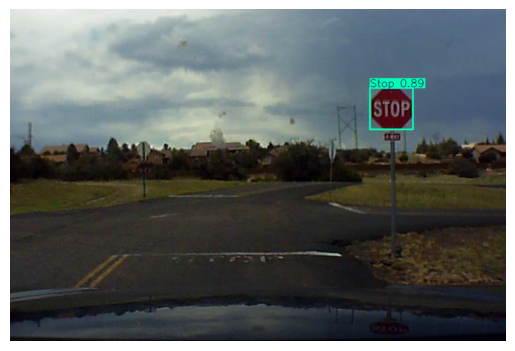

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Detection complete! Check the output image.


In [ ]:
# Import required libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLO model (best.pt)
model = YOLO("/content/best.pt")  # Provide the correct path to your model file

# Load the image from a specific path
image_path = "/content/example_stop.png"  # Provide the correct image path ex1_stop ex3speed15
image = cv2.imread(image_path)
# Image enhancement using Unsharp Masking
# 1. Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.5)

# 2. Subtract the blurred image from the original image to create the "mask"
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
# Perform object detection on the image
results = model(sharpened_image)

# Get the annotated image (with bounding boxes and labels)
annotated_image = results[0].plot()

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axes for better presentation
plt.show()

# Optionally, save the annotated image
output_image_path = "/content/output_image_train_stop.jpg"
cv2.imwrite(output_image_path, annotated_image)

# Optionally, download the annotated image (if needed)
from google.colab import files
files.download(output_image_path)

print("Detection complete! Check the output image.")
